<a href="https://colab.research.google.com/github/msr35/DataStorytelling/blob/main/CODE%3A%20Predictive_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Mathematical Modelling**


*Author*: Mark Rosin  
*Contact*: mrosin@pratt.edu  
*License*: Creative Commons CC0 1.0 Universal  

*About*: We tend to think of data as *descriptive*. The result of a census or transcripts or sales figures, for example. In scientific contexts, data are how we describe the world. They are the result of experiments and measuring naturally occurring phenomena, for example, the levels anthropogenic carbon dioxide in the atmosphere or the results of a vaccine trial.

However, with the right tools, we can also *create* data that extrapolates from a state of limited knowledge to a fuller understanding. We can even generate data that makes predictions about future scenarios. This is known as *mathematical modelling*. It is the use of mathematics to model a scenario using well defined equations, and the solving of these equations to generate data about that scenario. Sometimes this can be done using pencil and paper, but increasingly these mathematical models can only be solved on a computer. The results of simulation are a core part of not only science (think climate modelling, drug discovery, engineering, physics), but also finance, weather modelling, business, and running government. The results given by these models are known as *simulation data*.  

In this notebook we take a look at a simple model for describing the dynamics of a population. Let's start with a simple example—exponential growth—and proceed from there.

## Setting up this notebook:

Before we start, please make a copy of this notebook in drive. This will let you edit and run it.

## A Zombie Population Story

Imagine a city infected by zombies. At first, there are only a few zombies wandering the streets. Plenty of humans are available to infect, so the zombie population grows quickly. Each new zombie can infect more humans, leading to rapid spread. Let's try to model this simple scenario, and later we will add some modifications.

Note: If you don't like zombies, you can substitute any sort of parasitic organism.

the-walking-dead-group-of-zombies.avif

# **Outbreak: A Simple Exponential Model**

We can model this with a very simple equation. Let $x_t$ be the number of zombies on day $t$. Then the number of zombies on the next day $t+1$:

$$
x_{t+1} = r \, x_t
$$

Here, $r$ is the **growth rate**:
- If $r > 1$, each zombie creates more than one new zombie (on average), so the outbreak grows.
- If $r = 1$, the population stays constant.
- If $r < 1$, zombies are being eliminated, so the population shrinks.

Let's see what happens when we simulate this over multiple days $n$.

In [ ]:
import numpy as np # numpy for handling numbers
import matplotlib.pyplot as plt # for plotting

In [1]:
def zombies(x0, r, n_steps):

  # x0 is the number of zombies on day 1, r is the growth rate, and n_steps is the number of days

    x = np.zeros(n_steps)
    x[0] = x0

    for t in range(n_steps - 1):
        x[t+1] = r * x[t] # exponential growth

    return x

Let's see what our function does.

Like compound interest, the population grows quickly. Very quickly. After 7 days it has almost doubled. After 14 it has almost doubled again. The *data* generated by our model is given by $x_t$. That is, the zombie population at some future time, $t$.

In [ ]:
# Parameters
x0 = 10          # initial number of zombies
r = 1.1          # growth rate
n_steps = 30     # number of days to simulate

# Run simulation
population = zombies(x0, r, n_steps)

# Display first few values
print("Day 0:", population[0])
print("Day 1:", population[1])
print("Day 2:", population[2])
print("Day 7:", population[7])
print("Day 14:", population[14])

### Model Solution

*"Compound interest is the eighth wonder of the world. [S]he who understands it, earns it. [S]he who doesn't, pays it"* — Albert Einstein (apocryphal)  

The patterns of how it grows will become clearer if we visualize the results:

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.title(f'Zombie Population Over Time (r = {r})', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

This growth pattern is known as "exponential growth". It occurs when the rate of growth is proportional the thing that's growing.

(For those of you that have studied calculus, the equation above is equivalent to the ordinary differential equation $dx/dt = x k$ which can be solved by hand to give a solution of the form $x(t) = x_0 e^{kt}$, where $k = \ln(r)$ if each time unit $\Delta t = 1$. For those of you that don't know calculus, don't worry.)

Now you have a go. Try comparing multiple growth rates. Remember, when $r>1$, the zombies are infecting more zombies, and when $r<1$ they are dying out.

In [ ]:
x0 =  # Try changing this!
r =   # Try changing this!
n_steps = # Try changing this!

population = zombies(x0, r, n_steps)

plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4, color='purple')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.yscale('log')
plt.title(f'Experiment: r = {r}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

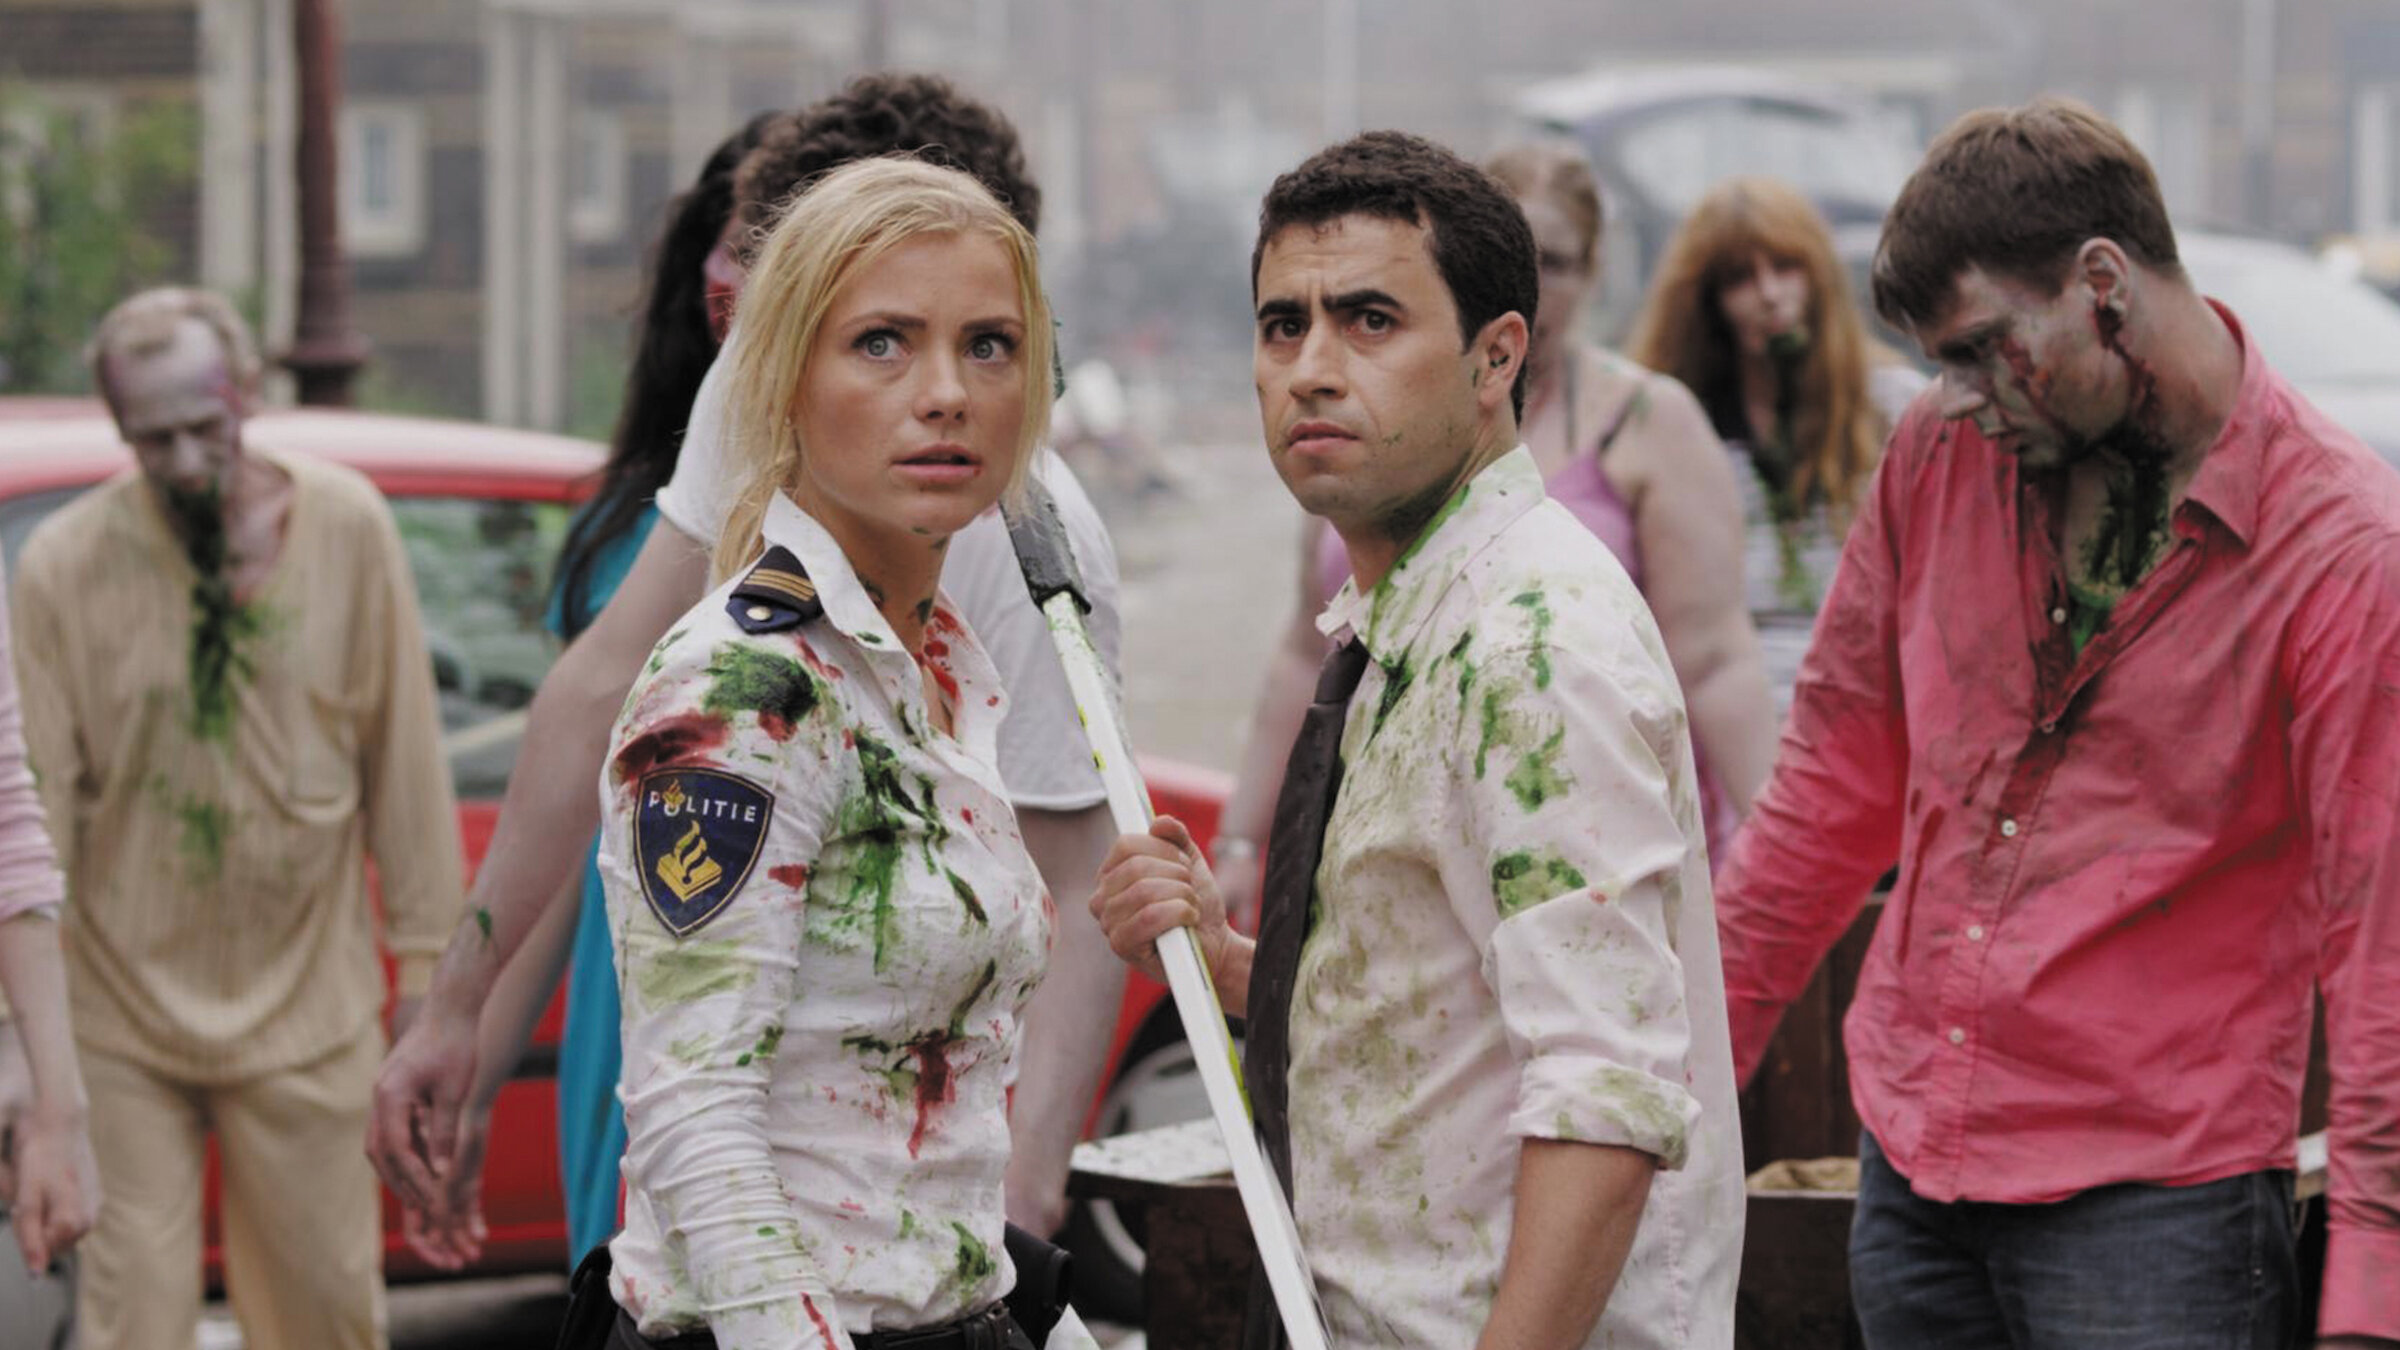

# **The Humans Fight Back: Constant feedback**

What if we modify our model to allow for the addition or removal of zombies from sources other than infection? For example, zombies may arrive from other locations, or they may be eliminated by humans. Let the daily change (either positive or negative) in the number of zombies be $c$. The governing equation is now:

$$
x_{t+1} = r \, x_t + c
$$

where $c$ can be either positive or negative.

In [ ]:
def zombies2(x0, r, c, n_steps):

    x = np.zeros(n_steps)
    x[0] = x0

    for t in range(n_steps - 1):
        x[t+1] = r * x[t] + c # exponential growth with constant feedback

        if x[t+1] < 0: # to deal with negative numbers
          x[t+1] = 0

    return x

Again, let's see what happens. Here, our $data$ is still $x_t$, but because the model we're using to generate these data is different, so will be the data.

Often the biggest challenge in mathematical modelling is to construct a model that produces realistic data. And sometimes you won't even know if your model works until after you've run it.

In [ ]:
# Parameters
x0 = 20         # initial number of zombies
r = 1.2         # growth rate
n_steps = 50     # number of days to simulate
c = -3            # number of zombies that arrive/leave each day

# Run simulation
population = zombies2(x0, r, c, n_steps)

# Display first few values
print("Day 0:", population[0])
print("Day 1:", population[1])
print("Day 2:", population[2])
print("Day 7:", population[7])
print("Day 14:", population[14])

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.title(f'Zombie Population Over Time (r = {r}, c = {c})', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

Even through this model is more complicated, the answer still looks like it's either exponential growth or exponential decay. However, unlike the simple model above, it *can* also tend to an equilibrium where the number of zombies eventually stabalizes.

The conditions for equilibrium are when $r<1$ and $c>0$. That is, the local population is dying out, but a fixed number of new zombies arrive every day. In this case the population can reach an equilibrium at a value:

$$
x^* =
\frac{1-r}{c}
$$


**Try to find an equilibrium below.**

In [ ]:
# Edit the parameters in the code cells above to visualize how the an equilibrium solution is reached.

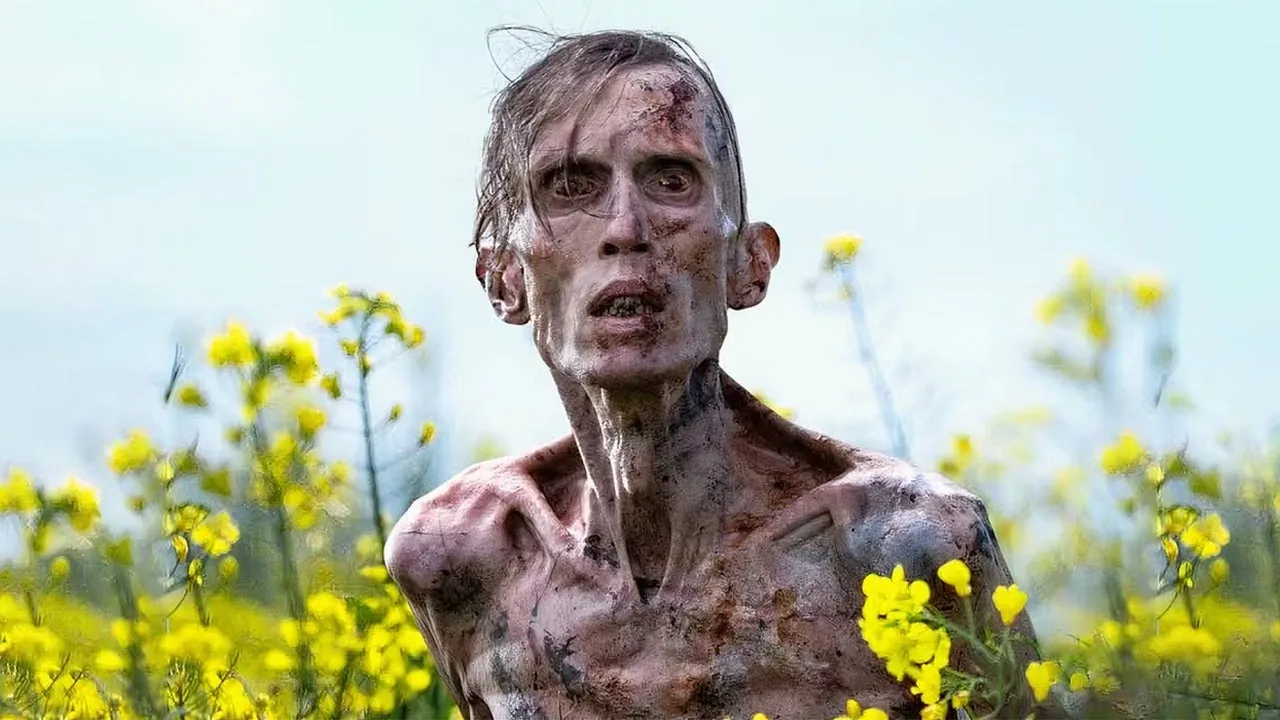

# **Surprise Ending: The Logistic Model**

The next and final step in our model progression is to make the feedback term non-linear, $x_t^2$. This is a *limiting* terms. It describes effects like overcrowding by zombies or the limits to the size of the city.

\begin{align}
x_{t+1} &= r\,x_t\left(1 - x_t\right) \\
&= r\,x_t - r\,x_t^2
\end{align}

This model is widely used in population dynamic modelling because, despite its simplicity, it can capture a wide range of behaviours. Here, unlike our earlier models, the data are very interesting.

In [ ]:
def zombies3(x0, r, n_steps):

    x = np.zeros(n_steps)
    x[0] = x0

    for t in range(n_steps - 1):
        x[t+1] = r * x[t] * (1 - x[t]) # the logistic model

    return x

Here's some code you can run to calculate the zombie population.

Try modifying the growth rate. Explore a bunch of numbers between say, $r=0$ and $r = 4$. Note down some casual observations:

In [ ]:
# Parameters
x0 = 0.1
r = 2.2
n_steps = 50

# Run simulation
population = zombies3(x0, r, n_steps)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4)
plt.xlabel('Time step', fontsize=12)
plt.ylabel('Population (normalized)', fontsize=12)
plt.title(f'Logistic Map (r={r})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

**Question**: What sort of population behaviour are you seeing? Unlimited growth? Decay? Equilibrium? Variation? For what values of $r$ does this behavior hold?

**Answer**

Let's now capture our data in an array so we can look at it. Here I'll be using a common scientific data type known as a numpy array.

In [ ]:
# Define parameter ranges
r_values = np.linspace(0, 4.0, 100)  # 100 values of r
n_steps = 200
x0 = 0.1

# Store results in a 2D numpy array (rows = r values, columns = time steps)
results = np.zeros((len(r_values), n_steps))

for i, r in enumerate(r_values):
    results[i, :] = zombies3(x0, r, n_steps)

print(f"Results shape: {results.shape}")
print(f"Row = different r value, Column = time step")

We can explore the values with the code below, and even plot them:

In [ ]:
# Get the time series for a specific r value (e.g., the 50th r value)
single_trajectory = results[50, :]

# Get the final population for all r values
final_populations = results[:, -1]

# Get population at time step 100 for all r values
pop_at_t100 = results[:, 100]

In [ ]:
# Plot a few trajectories
plt.figure(figsize=(10, 5))
for i in [0, 25, 50, 75, 99]:
    plt.plot(results[i, :], label=f'r = {r_values[i]:.2f}')

plt.xlabel('Time step')
plt.ylabel('Population')
plt.title('Logistic Map for Different r Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

What you should notice is that depending on the value of $r$, the behavior can be very different.

Let's explore with this interactive version (only available in Colab, not Github):

In [ ]:
# This only works when running the code in Colab, not in Github interface. Uncomment this to see if in action in Colab.

# from ipywidgets import interact

# @interact(r=(0.5, 4.0, 0.1), n=(20, 100, 5))
# def plot_logistic_map(r=2.8, n=50):
#     """Interactive logistic map visualization."""
#     x0 = 0.1
#     population = zombies3(x0, r, n)

#     plt.figure(figsize=(10, 5))
#     plt.plot(population, marker='o', linewidth=2, markersize=4)
#     plt.xlabel('Time step', fontsize=12)
#     plt.ylabel('Population (normalized)', fontsize=12)
#     plt.title(f'Logistic Map (r={r})', fontsize=14)
#     plt.ylim(0, 1)
#     plt.grid(True, alpha=0.3)
#     plt.show()

We can summarize this with the most famous examples of mathematical data visaulization: the **bifurcation diagram of the logistic map**. This plot captures the rich variety of behavior described by the logistic model.

The plot shows the *"end"* values of the population model. That is, the values once the system has moved away from its starting setup. You'll see that for some values of $r$, the end value is a singe number, but for others there is no single end number, rather they population falls into cyclical a growth-decay dynamic, and for yet other values it goes completely haywire leading to mathematical $chaos$.

In [ ]:

def bifurcation_diagram(r_min=2.5, r_max=4.0, n_r=1000, n_transient=200, n_plot=100):

    r_values = np.linspace(r_min, r_max, n_r)
    x0 = 0.1

    # Store r and corresponding x values
    r_plot = []
    x_plot = []

    for r in r_values:
        # Run simulation
        x = zombies3(x0, r, n_transient + n_plot)

        # Keep only the last n_plot values (after transient)
        x_final = x[n_transient:]

        # Store r value repeated for each x value
        r_plot.extend([r] * len(x_final))
        x_plot.extend(x_final)

    # Plot
    plt.figure(figsize=(12, 7))
    plt.plot(r_plot, x_plot, ',k', markersize=0.5, alpha=0.3)
    plt.xlabel('Growth rate (r)', fontsize=14)
    plt.ylabel('Long-term population values', fontsize=14)
    plt.title('Bifurcation Diagram of the Logistic Map', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.show()

# Create the diagram
bifurcation_diagram()

# **Epilogue**

## The Zombie Outbreak: From Stability to Chaos

Our zombie model shows how different infection rates lead to dramatically different outcomes.

### Low Infection Rate ($r < 1$): Outbreak Dies Out

When $r$ is low, the zombie population shrinks and eventually dies out. The humans win.

### Moderate Infection Rate ($1 < r < 3$): Stable Equilibrium

The zombie population settles to a fixed value $x^* = \frac{r-1}{r}$. The city reaches an uneasy balance where new infections match eliminations.

### Higher Infection Rate ($3 < r < 3.57$): Oscillations

Stability breaks down. The population oscillates between 2 values, then 4, then 8, then 16... The pattern becomes increasingly complex as $r$ increases.

### Very High Infection Rate ($r > 3.57$): Chaos

All predictability breaks down. The zombie population jumps unpredictably from day to day. This is **deterministic chaos**—completely determined by our equation, but impossible to predict in practice. Tiny differences in today's count lead to wildly different futures.
